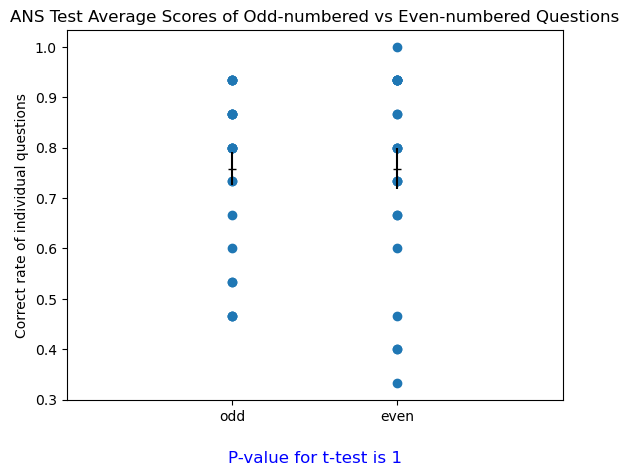

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress, ttest_ind
from tabulate import tabulate

def t_test(new_df, ID):
    mean_score_individual = []
    row_num = 0

    for correct_answer in new_df["Correct"]:
        scores = []
        for col in new_df.columns[:-1]:  # Exclude the "Correct" column
            if new_df[col].iloc[row_num] == correct_answer:
                scores.append(1)
            else:
                scores.append(0)
        mean_score_individual.append(sum(scores)/len(ID))
        row_num += 1  # Increment row_num to move to the next row for comparison

    new_df["mean_score_individual"] = mean_score_individual

    even_num_result = new_df["mean_score_individual"].iloc[1::2]
    odd_num_result = new_df["mean_score_individual"].iloc[0::2]

    p_value = ttest_ind(even_num_result, odd_num_result).pvalue
    
    return p_value


def dotplot(new_df):
    fig, ax = plt.subplots() 

    index_label = []
    for i in new_df.index:
        if (i) % 2 != 0:
            index_label.append("odd")
        else:
            index_label.append("even")

    df_4_plot = pd.DataFrame({ 'index_label': index_label, 'ind_ave': new_df["mean_score_individual"] } )

    ax.plot(df_4_plot['index_label'],df_4_plot["ind_ave"],'o')
    ax.set_xlim(-1,2)

    odd_df = df_4_plot.query( "index_label=='odd'" )
    even_df = df_4_plot.query( "index_label=='even'" )

    odd_mean = odd_df['ind_ave'].mean()
    odd_std_err = stats.sem(odd_df['ind_ave'])

    even_mean = even_df['ind_ave'].mean()
    even_std_err = stats.sem(even_df['ind_ave'])

    ax.errorbar('odd',odd_mean,  yerr=odd_std_err,  marker='_',  color='black')
    ax.errorbar('even',even_mean,  yerr=even_std_err,  marker='_',  color='black')
    ax.set_xlabel(f"P-value for t-test is {p_value:.3g}",color='blue', fontsize='large', labelpad=20)
    ax.set_ylabel("Correct rate of individual questions")
    ax.set_title("ANS Test Average Scores of Odd-numbered vs Even-numbered Questions")

    plt.show()
    return

df2 = pd.read_csv("ANS_individual.csv")
user_answers = df2['user response'].str.split(', ')
new_df2 = pd.DataFrame(user_answers.tolist(), index=df2['User id'], columns=range(1, 49)).transpose()
new_df2["Correct"] = ["Left", "Left", "Left", "Right", "Left", "Right", "Left", "Left", "Right", "Left", "Left", "Left", "Right", "Right", "Left", "Left", "Left", "Right", "Right", "Right", "Right", "Right", "Right", "Right", "Right", "Right", "Left", "Left", "Left", "Right", "Left", "Left", "Left", "Right", "Left", "Left", "Right", "Left", "Right", "Right", "Left", "Left", "Right", "Left", "Left", "Left", "Left", "Left"
]

p_value = t_test(new_df2, df2['User id'])

dotplot_ANS = dotplot(new_df2)